<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

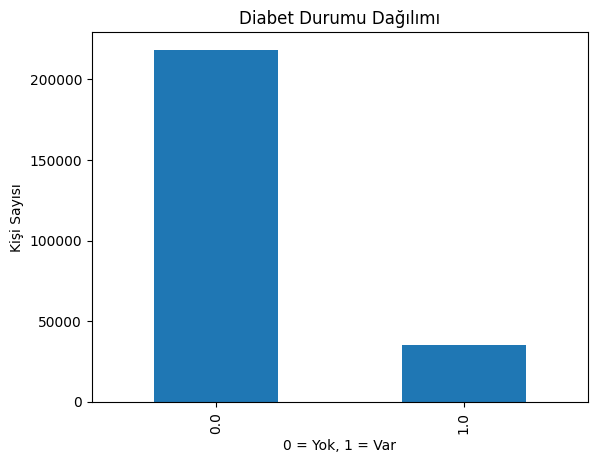

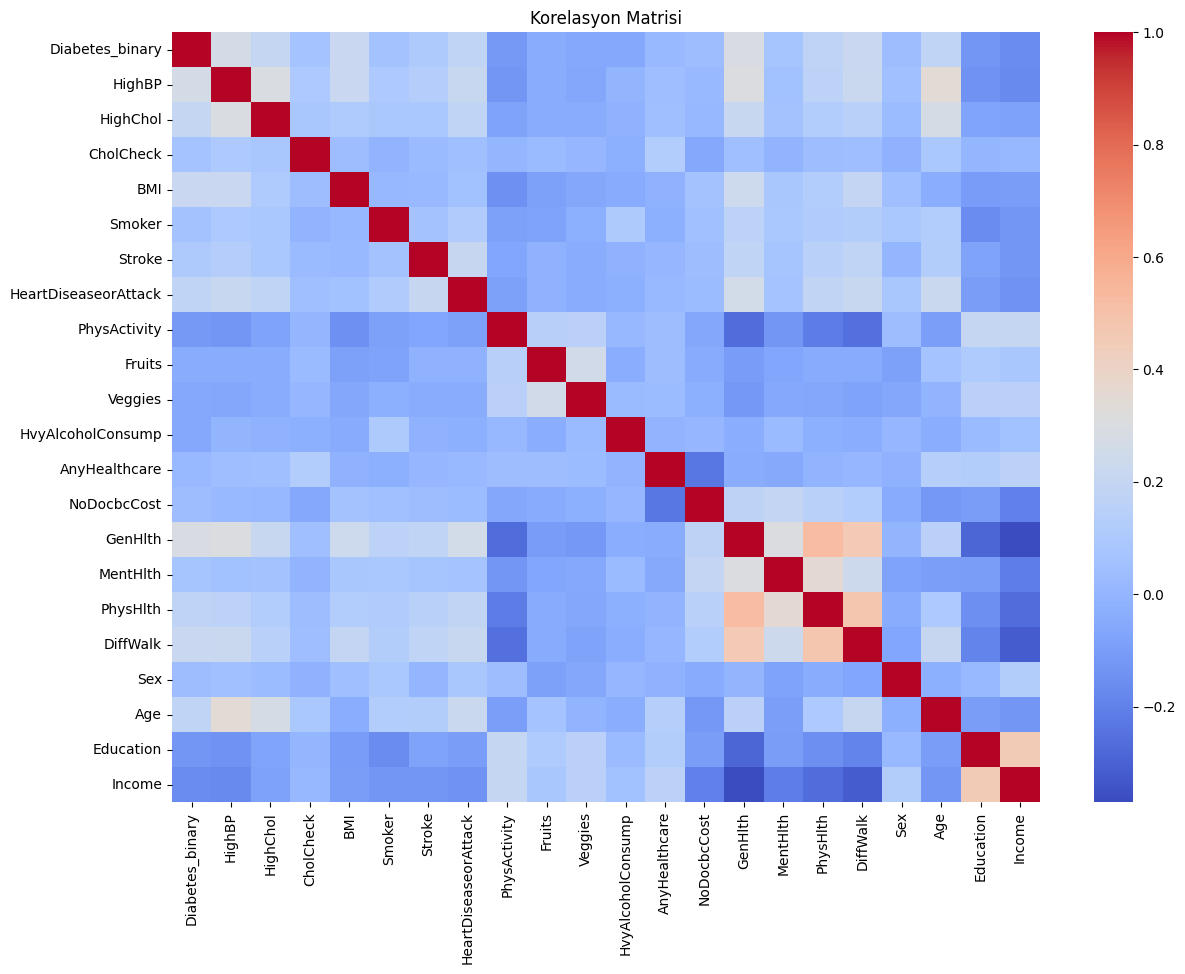

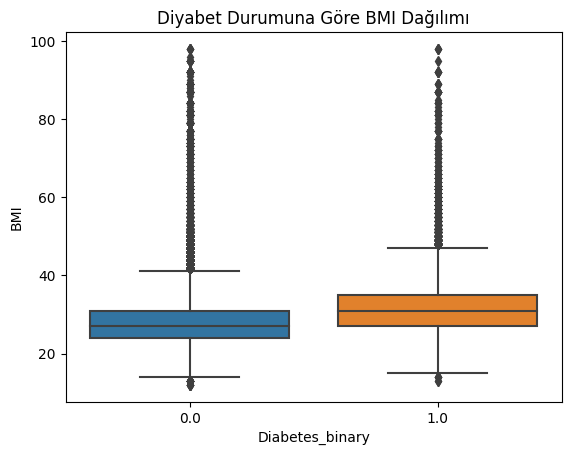

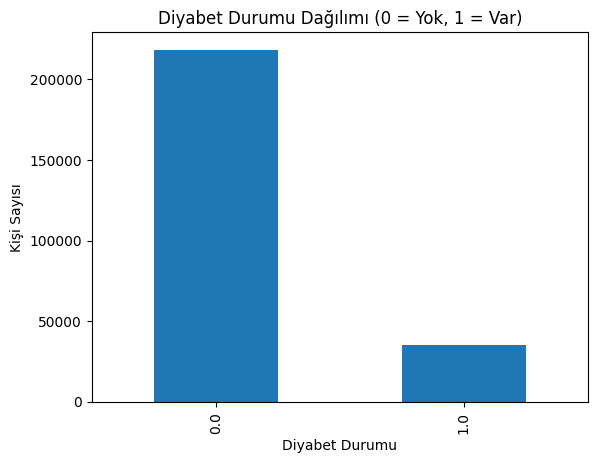

Logistic Regression Accuracy: 0.865874329864396
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

Random Forest Accuracy: 0.8598628192999054
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data sets from file 
df = pd.read_csv("/kaggle/input/diabetes-binary-health-indicators/diabetes_binary_health_indicators_BRFSS2015.csv")

# displays first 5 lines 
df.head()

#EDA 
df.shape
df.info()
df.describe()

#target variable distribution (0: no diabetes, 1: diabetes) 
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title("Diabet Durumu Dağılımı")
plt.xlabel("0 = Yok, 1 = Var")
plt.ylabel("Kişi Sayısı")
plt.show()

#correlation matrix 
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Korelasyon Matrisi")
plt.show()

#visualisation of features 
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title("Diyabet Durumuna Göre BMI Dağılımı")
plt.show()

#check to see how many people have diabetes
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title("Diyabet Durumu Dağılımı (0 = Yok, 1 = Var)")
plt.xlabel("Diyabet Durumu")
plt.ylabel("Kişi Sayısı")
plt.show()


#for data pre-processing 
#separate features (X) and target variable (y)
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

#it splits the data into training and test sets (80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#it standardises numeric data (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# creates and trains the model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

#make prediction with test data
y_pred_lr = lr_model.predict(X_test_scaled)

# evaluate the performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


#Random Forest Model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# creates and trains the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#make prediction with test data
y_pred_rf = rf_model.predict(X_test)

# evaluate the performance 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


#Conclusion: Since the recognition rate of both models for individuals with diabetes was low, a class imbalance problem was identified. 

